# fruits를 KNN으로 분류하기

In [1]:
import pandas as pd
fruits =pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set과 Target Set을 Numpy의 Array로 변경

In [2]:
# 연습 : numpy의 column stack과 row stack

import numpy as np
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

In [3]:
# 2개의 array를 묶어서 컬럼기반으로 하나의 array로 만들기
combineA = [[i,j] for i,j in zip(testA, testB)]
print(np.array(combineA))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [4]:
# 다른 방법
combineB = np.column_stack((testA, testB))
print(combineB)

combineC = np.row_stack((testA, testB))
print(combineC)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
[[ 1  2  3  4]
 [10 20 30 40]]


---

In [5]:
fruit_data = np.column_stack((fruits.length, fruits.weight))
fruit_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [6]:
fruit_target = np.array(fruits['name'])
fruit_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [7]:
# sklearn으로 train test 분류
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
fruit_data, fruit_target, stratify=fruit_target,random_state =42
)


from sklearn.neighbors import KNeighborsClassifier

oh = KNeighborsClassifier()

In [8]:
# knn으로 학습시키고
from sklearn.neighbors import KNeighborsClassifier
kn =KNeighborsClassifier()
kn.fit(train_input, train_target)
# fit은 학습시키는것

KNeighborsClassifier()

In [9]:
# 정확도 출력하기
kn.score(train_input, train_target)

1.0

---
# 수상한 과일?

In [10]:
kn.predict([[25, 150]])

array(['berry'], dtype=object)

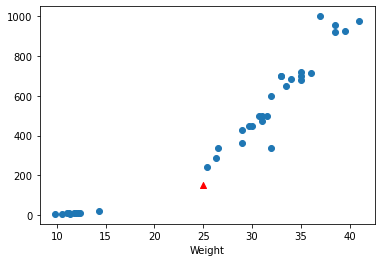

In [11]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', c='red')

plt.xlabel('Length')
plt.xlabel('Weight')
plt.show()

> apple 쪽에 가까운거같은데 berry라니?

In [12]:
# 이웃을 출력해보자
distance, indexes = kn.kneighbors([[25, 150]])
print(indexes)

[[11 20 13 22 15]]


In [13]:
# 이웃에 index에 해당하는 Feature를 출력
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

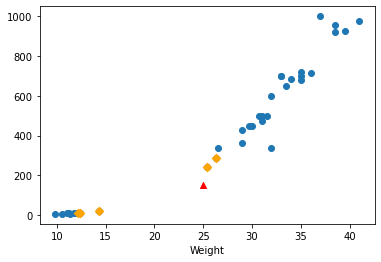

In [14]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', c='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D', c='orange')

plt.xlabel('Length')
plt.xlabel('Weight')
plt.show()

In [15]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

In [16]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

---
# 기준을 맞추자

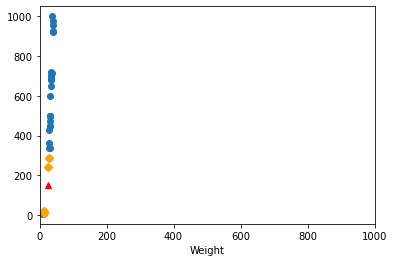

In [17]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^', c='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D', c='orange')

plt.xlabel('Length')
plt.xlabel('Weight')
plt.xlim(0, 1000)
plt.show()

> sample(data)이 Length에는 거의 영향을 받지 않고 Weight에서 영향을 많이 받는다.       
> 차트의 모양대로 현재는 berry로 생각하는 것이 맞는것 같다.   

In [18]:
# Length와 Weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [19]:
print(mean, std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


> Length와 Weight의 차이가 너무 심하다.     
> 이럴때는 표준화를 사용한다.

---
# train_data를 표준점수(Z점수)로 변경하자
표준점수 = (Feature - 평균) / 표준편차       
계수값 = 표준편차 / (Feature - 평균)

In [20]:
train_scaled = (train_input - mean) / std
train_scaled[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

In [21]:
# sklearn을 이용한 방법 # 위코드나 이코드 둘중 사용가능
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaler.fit(train_input)
train_scaled2 =scaler.transform(train_input)
train_scaled2[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

---
### 전처리 데이터로 모델 훈련하기

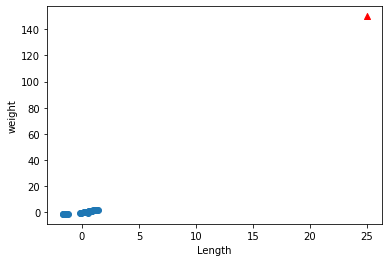

In [22]:
plt.scatter(train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(25, 150, marker='^', c ='red')

plt.xlabel('Length')
plt.ylabel('weight')
plt.show()

> 예측할 데이터로 표준점수로 변경이 필요

In [23]:
new =([25, 150] - mean) / std
new

array([-0.19158198, -0.89671889])

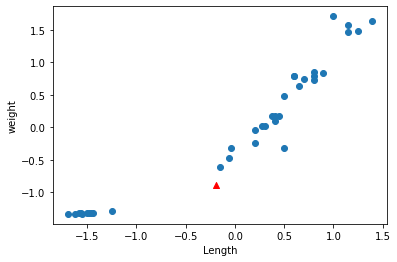

In [24]:
plt.scatter(train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(new[0],new[1], marker='^', c ='red')

plt.xlabel('Length')
plt.ylabel('weight')
plt.show()

In [25]:
### KNN으로 분류

In [26]:
kn.fit(train_scaled2, train_target)
# 타겟을 표준화가 필요없다. 이름이기때문에

KNeighborsClassifier()

In [27]:
# 검증 데이터도 표준점수로 변경 (***** 중요 : 평균과 표준편차는 Train Set에서 구한 값으로 사용한다.)
test_scaled = (test_input - mean) / std

In [28]:
# 정확도 확인
kn.score(test_scaled, test_target)

1.0

In [29]:
# 수상한 과일을 다시 예측하자
print(kn.predict([new]))

['apple']


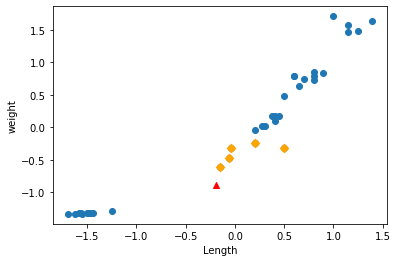

In [30]:
# 확인을 위해 이웃을 출력하자
distance, indexes = kn.kneighbors([new])

plt.scatter(train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(new[0],new[1], marker='^', c ='red')
plt.scatter(train_scaled2[indexes,0], train_scaled2[indexes, 1], marker='D', c='orange')
plt.xlabel('Length')
plt.ylabel('weight')
plt.show()
# 아래의 plt는 표준화 후의 plt 이다. 위의 plt가 다르게 변경되었다. 두개를 비교해서 확인해보기